[詳解 ディープラーニング ~TensorFlow・Kerasによる時系列データ処理~](https://www.amazon.co.jp/dp/4839962510) に沿って動かしてみます

# 3章　ニューラルネットワーク（後半）

## 3.5 多クラスロジスティック回帰

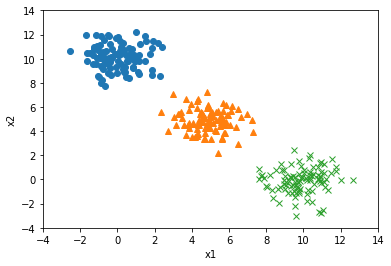

In [23]:
%matplotlib inline
import numpy as np
import tensorflow as tf
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

np.random.seed(0)
tf.set_random_seed(0)

M = 2      # 入力データの次元
K = 3      # クラス数
n = 100    # クラスごとのデータ数
N = n * K  # 全データ数

#
#データの生成
#
# クラス1: (0,10)付近
X1 = np.random.randn(n, M) + np.array([0, 10])
Y1 = np.array([[1, 0, 0] for i in range(n)])
# クラス2: (5,5)付近
X2 = np.random.randn(n, M) + np.array([5, 5])
Y2 = np.array([[0, 1, 0] for i in range(n)])
# クラス3: (10,0)付近
X3 = np.random.randn(n, M) + np.array([10, 0])
Y3 = np.array([[0, 0, 1] for i in range(n)])

# 3クラス分のデータを結合して全体のデータを作成
X = np.concatenate((X1, X2, X3), axis=0)
Y = np.concatenate((Y1, Y2, Y3), axis=0)

# データをプロット
plt.plot(X1[:,0],X1[:,1],'o')
plt.plot(X2[:,0],X2[:,1],'^')
plt.plot(X3[:,0],X3[:,1],'x')
plt.xlim(-4,14)
plt.ylim(-4,14)
plt.xlabel("x1")
plt.ylabel("x2")


In [24]:
#
# モデル設定
#
W = tf.Variable(tf.zeros([M, K]))
b = tf.Variable(tf.zeros([K]))

x = tf.placeholder(tf.float32, shape=[None, M])
t = tf.placeholder(tf.float32, shape=[None, K])
y = tf.nn.softmax(tf.matmul(x, W) + b)

# tf.reduce_mean()でミニバッチ毎の平均値を算出
# tf.reduce_sum()のreduction_indices=[1] …行方向の和
cross_entropy = tf.reduce_mean(-tf.reduce_sum(t * tf.log(y),
                               reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)

# 分類が正しいか確認用
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(t, 1))

In [25]:
#
# （tf.reduce_sumの動作確認用）
#
test = np.array([[1., 2., 3.],[4., 5., 6.]])
print(test)
# 全体
print(sess.run(tf.reduce_sum(test)))
# 列方向
print(sess.run(tf.reduce_sum(test, reduction_indices=[0])))
# 行方向
print(sess.run(tf.reduce_sum(test, reduction_indices=[1])))

[[ 1.  2.  3.]
 [ 4.  5.  6.]]
21.0
[ 5.  7.  9.]
[  6.  15.]


In [21]:
#
# 学習実施
#

# 初期化
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# ミニバッチサイズ
batch_size = 50  
# ミニバッチでループさせる回数を切り捨て除算で算出
n_batches = N // batch_size

# ミニバッチ学習
# epoch=データ全体に対する反復回数
for epoch in range(20):
    # 全体をシャッフル
    X_, Y_ = shuffle(X, Y)
    
    # ミニバッチごとにループ
    for i in range(n_batches):
        start = i * batch_size
        end = start + batch_size

        sess.run(train_step, feed_dict={
            x: X_[start:end],
            t: Y_[start:end]
        })
    
    print("epoc:" ,epoch)
    print("   w:" ,sess.run(W))
    print("   b:" ,sess.run(b))

print("**** train finish ****")

print("w:" ,sess.run(W))
print("b:" ,sess.run(b))
        
        

epoc: 0
   w: [[-0.3624872   0.06263676  0.29985043]
 [ 0.26875529  0.09939516 -0.36815047]]
   b: [-0.01472155  0.02038056 -0.00565901]
epoc: 1
   w: [[-0.49481827  0.13629861  0.35851967]
 [ 0.37763828  0.12717733 -0.50481564]]
   b: [-0.01918472  0.03392778 -0.01474305]
epoc: 2
   w: [[-0.58405054  0.1470812   0.43696928]
 [ 0.43812063  0.15078039 -0.58890104]]
   b: [-0.0243234   0.04096479 -0.01664138]
epoc: 3
   w: [[-0.65667045  0.18153469  0.47513577]
 [ 0.47798371  0.18214238 -0.66012615]]
   b: [-0.02967442  0.05086593 -0.0211915 ]
epoc: 4
   w: [[-0.70878232  0.19525024  0.51353204]
 [ 0.52720332  0.18758069 -0.71478415]]
   b: [-0.03184819  0.05584501 -0.0239968 ]
epoc: 5
   w: [[-0.75774044  0.20737422  0.55036622]
 [ 0.55193722  0.20816442 -0.76010174]]
   b: [-0.03590736  0.06183938 -0.025932  ]
epoc: 6
   w: [[-0.79525352  0.21034396  0.58490956]
 [ 0.58948785  0.20853873 -0.79802656]]
   b: [-0.0375367   0.06485493 -0.02731821]
epoc: 7
   w: [[-0.83039081  0.22232275  

In [22]:
#
# 学習結果の確認
#
X_, Y_ = shuffle(X, Y)

# シャッフルしたデータのうち10個で確認
classified = correct_prediction.eval(session=sess, feed_dict={
    x: X_[0:10],
    t: Y_[0:10]
})
prob = y.eval(session=sess, feed_dict={
    x: X_[0:10]
})

print('classified:')
print(classified)
print()
print('output probability:')
print(prob)

classified:
[ True  True  True  True  True  True  True  True  True  True]

output probability:
[[  6.19771937e-03   9.78941202e-01   1.48609644e-02]
 [  3.10711865e-03   9.81328845e-01   1.55640207e-02]
 [  9.93816912e-01   6.18305197e-03   2.58843458e-09]
 [  1.43191004e-02   9.78989422e-01   6.69154013e-03]
 [  1.97073966e-02   9.73151386e-01   7.14115053e-03]
 [  3.53435382e-07   3.49676870e-02   9.65031981e-01]
 [  9.98172998e-01   1.82698795e-03   7.77147513e-10]
 [  1.10108467e-09   9.71025508e-03   9.90289748e-01]
 [  9.95387256e-01   4.61280299e-03   1.90209430e-08]
 [  9.92935002e-01   7.06495531e-03   1.27505553e-08]]


-2.55298981583
12.6962240526
---X1---
-1.09313
0.795459
-0.0591481
---X2---
0.300588
0.293977
0.108083
---X3---
0.792541
-1.08944
-0.0489351


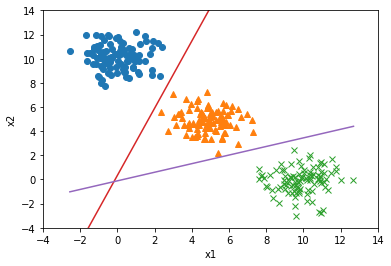

In [6]:
# グラフ描画用　Xの範囲を抽出
x1_min = X[:,0].min()
x1_max = X[:,0].max()
print(x1_min)
print(x1_max)

plt.plot(X1[:,0],X1[:,1],'o')
plt.plot(X2[:,0],X2[:,1],'^')
plt.plot(X3[:,0],X3[:,1],'x')
plt.xlim(-4,14)
plt.ylim(-4,14)
plt.xlabel("x1")
plt.ylabel("x2")


# 学習結果をNdArrayに詰める
result_w = sess.run(W)
result_b = sess.run(b)

# X1(0,10付近のグループ)
X1_w1 = result_w[0,0]
X1_w2 = result_w[1,0]
X1_b = result_b[0]
print("---X1---")
print(X1_w1)
print(X1_w2)
print(X1_b)


# X2(5,5付近のグループ)
X2_w1 = result_w[0,1]
X2_w2 = result_w[1,1]
X2_b = result_b[1]
print("---X2---")
print(X2_w1)
print(X2_w2)
print(X2_b)

# X3(10,0付近のグループ)
X3_w1 = result_w[0,2]
X3_w2 = result_w[1,2]
X3_b = result_b[2]
print("---X3---")
print(X3_w1)
print(X3_w2)
print(X3_b)

# X1とX2の分類直線
x1 = np.linspace(x1_min, x1_max, 5)
# X1_w1 * x1 + X1_w2 * x2 + X1_b = X2_w1 * x1 + X2_w2 * x2 + X2_b
x2a = ((X2_w1 - X1_w1) * x1) / (X1_w2 - X2_w2)  + (X2_b - X1_b) / (X1_w2 - X2_w2)
plt.plot(x1, x2a, "-")

# X3とX2の分類直線
x1 = np.linspace(x1_min, x1_max, 5)
# X3_w1 * x1 + X3_w2 * x2 + X3_b = X2_w1 * x1 + X2_w2 * x2 + X2_b
x2b = ((X2_w1 - X3_w1) * x1) / (X3_w2 - X2_w2)  + (X2_b - X3_b) / (X3_w2 - X2_w2)
plt.plot(x1, x2b, "-")


## 3.6 多層パーセプトロン

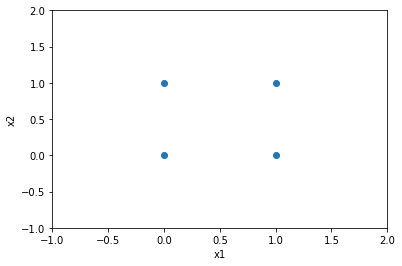

In [35]:
%matplotlib inline
import numpy as np
import tensorflow as tf
from sklearn.utils import shuffle
import matplotlib.pyplot as plt


tf.set_random_seed(0)

#
# データの生成 (XOR)
#
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0],    [1],    [1],    [0]])


plt.plot(X[:,0],X[:,1],'o')
plt.xlim(-1,2)
plt.ylim(-1,2)
plt.xlabel("x1")
plt.ylabel("x2")

In [36]:
#
# モデル設定
#
x = tf.placeholder(tf.float32, shape=[None, 2])
t = tf.placeholder(tf.float32, shape=[None, 1])

# 入力層 - 隠れ層
W = tf.Variable(tf.truncated_normal([2, 2]))
b = tf.Variable(tf.zeros([2]))
h = tf.nn.sigmoid(tf.matmul(x, W) + b)

# 隠れ層 - 出力層
V = tf.Variable(tf.truncated_normal([2, 1]))
c = tf.Variable(tf.zeros([1]))
y = tf.nn.sigmoid(tf.matmul(h, V) + c)

cross_entropy = - tf.reduce_sum(t * tf.log(y) + (1 - t) * tf.log(1 - y))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)

# 正しく分類できているか確認用 
correct_prediction = tf.equal(tf.to_float(tf.greater(y, 0.5)), t)

#
# モデル学習
#
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

for epoch in range(4000):
    sess.run(train_step, feed_dict={
        x: X,
        t: Y
    })
    if epoch % 1000 == 0:
        print('epoch:', epoch)

print("W:" ,sess.run(W))
print("b:" ,sess.run(b))
print("V:"  ,sess.run(V))
print("c:"  ,sess.run(c))


epoch: 0
epoch: 1000
epoch: 2000
epoch: 3000
W: [[ 4.89622498  6.9116087 ]
 [ 4.88868618  6.86783981]]
b: [-7.49212503 -3.090523  ]
V: [[-11.47534466]
 [ 10.6570158 ]]
c: [-4.89556789]


In [37]:
#
# 学習結果の確認
#
classified = correct_prediction.eval(session=sess, feed_dict={
    x: X,
    t: Y
})
prob = y.eval(session=sess, feed_dict={
    x: X
})

print('classified:')
print(classified)
print()
print('output probability:')
print(prob)

classified:
[[ True]
 [ True]
 [ True]
 [ True]]

output probability:
[[ 0.01167707]
 [ 0.99126959]
 [ 0.9913078 ]
 [ 0.00936287]]


[[ 4.89622498  6.9116087 ]
 [ 4.88868618  6.86783981]]
[-7.49212503 -3.090523  ]


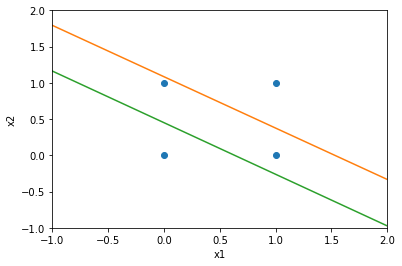

In [38]:
#
# 学習結果から境界線をひいてみる
#
plt.plot(X[:,0],X[:,1],'o')
plt.xlim(-1,2)
plt.ylim(-1,2)
plt.xlabel("x1")
plt.ylabel("x2")

result_w = sess.run(W)
result_b = sess.run(b)
result_v = sess.run(V)
result_c = sess.run(c)
print(result_w)
print(result_b)


x1 = np.linspace(-1,2,4)
x2 = -(result_w[0][0] * x1 )/ result_w[0][1] - (result_b[0] / result_w[0][1])
plt.plot(x1, x2, "-")
x2 = -(result_w[1][0] * x1 )/ result_w[1][1] - (result_b[1] / result_w[1][1])
plt.plot(x1, x2, "-")